In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [105]:
data=pd.read_csv('vgsales.csv')
df=pd.DataFrame(data)
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [106]:
df.drop(df.columns[[0,6, 7, 8,9]], axis=1, inplace=True)

In [107]:
df.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


In [108]:
X=df.iloc[:,:-1].values
y=df.iloc[:,5].values

<AxesSubplot:>

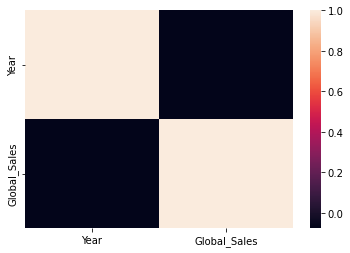

In [109]:
sns.heatmap(df.corr())

In [110]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le=LabelEncoder()

X[:,0]=le.fit_transform(X[:,0])
X[:,1]=le.fit_transform(X[:,1])
X[:,3]=le.fit_transform(X[:,3])
X[:,4]=le.fit_transform(X[:,4])

OHE=OneHotEncoder()
X=OHE.fit_transform(df[['Name','Platform','Genre','Publisher']])


In [111]:
X=X[:,1:]

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.4, random_state=0)

In [113]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [114]:
y_pred=reg.predict(X_test)
print(y_pred)

[ 2.04392451  1.28974047  0.98845707 ... -0.85523068  0.22342627
 -1.25141796]


In [115]:
print(reg.coef_)

[ 0.          0.         -1.4376385  ...  0.48222787  0.
  1.13942819]


In [116]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.14578688884539726

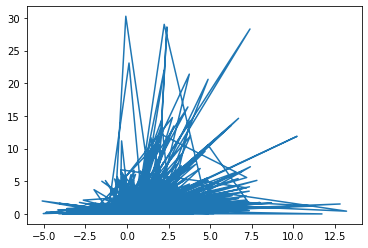

In [117]:
plt.plot(y_pred, y_test)

In [118]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(rmse)

1.4760505150685932


ValueError: x and y must be the same size

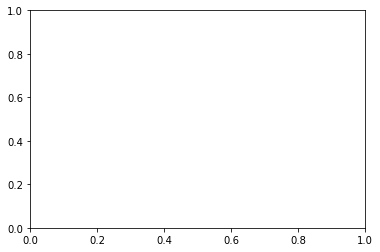